### Graphe & Applications TD3

In this notebook, I attempt to implement the Ford-Fulkerson max-flow algorithm. I used networkx & matplotlib for visualization. The algorithm works by iteratively finding an augmenting path from source to sink in the residuals graph - obtained by subtracting the current flow from the capacity of each edge. The algorithm then increases the flow along this path by the maximum possible amount, which is the minimum capacity of the edges along the path.

In this case, I represented the graph input with a dictionary where each key representing a node is assigned another dictionary representing target nodes and their edge capacities. 

In [ ]:
import networkx as nx #library for creating and manipulating networks
import matplotlib.pyplot as plt #visualization tools
from collections import defaultdict 

graph1 = {
    "S": {"A": 10, "B": 20, "C": 10, "D": 10},
    "A": {"E": 8, "F": 4},
    "B": {"A": 3, "E": 5, "F": 7, "G": 3, "C": 5},
    "C": {"F": 6, "G": 1, "H": 7},
    "D": {"C": 4, "H": 2, "G": 5},
    "E": {"P": 10, "F": 2},
    "F": {"P": 10},
    "G": {"F": 3, "P": 20, "H": 5},
    "H": {"P": 10},
    "P": {}
}

graph2 = {
    "A": {"E": 7},
    "E": {"H": 4, "F": 5, "I": 15},
    "H": {"J": 7},
    "I": {"K": 30, "H": 7, "L": 7},
    "K": {"J": 10},
    "D": {"G": 10},
    "C": {"F": 10, "G": 7},
    "G": {"I": 15},
    "F": {"I": 15, "G": 5},
    "B": {"A": 5, "F": 5},
    "J": {}
}

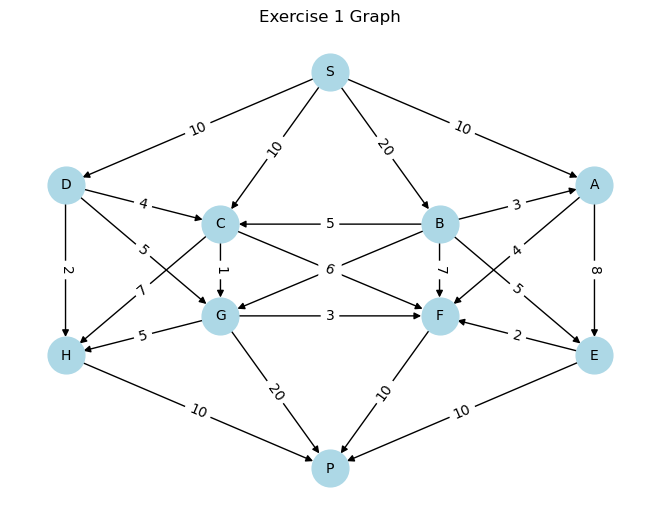

Maximum flow: 38
Path: [('S', 'A'), ('A', 'E'), ('E', 'P')]
Flow: 8

Path: [('S', 'A'), ('A', 'F'), ('F', 'P')]
Flow: 2

Path: [('S', 'B'), ('B', 'E'), ('E', 'P')]
Flow: 2

Path: [('S', 'B'), ('B', 'F'), ('F', 'P')]
Flow: 7

Path: [('S', 'B'), ('B', 'G'), ('G', 'P')]
Flow: 3

Path: [('S', 'C'), ('C', 'F'), ('F', 'P')]
Flow: 1

Path: [('S', 'C'), ('C', 'G'), ('G', 'P')]
Flow: 1

Path: [('S', 'C'), ('C', 'H'), ('H', 'P')]
Flow: 7

Path: [('S', 'D'), ('D', 'H'), ('H', 'P')]
Flow: 2

Path: [('S', 'D'), ('D', 'G'), ('G', 'P')]
Flow: 5



In [88]:
import networkx as nx #library for creating and manipulating networks
import matplotlib.pyplot as plt #visualization tools
from collections import defaultdict 

#create DiGraph object
def createGraph(graph):
    G = nx.DiGraph()
    for u in graph:
        for v, w in graph[u].items():
            G.add_edge(u_of_edge = u, v_of_edge = v, capacity = w)
    return G

#plot DiGraph object
def plotGraph(G):
    edge_lables = {(u, v): d["capacity"] for u, v, d in G.edges(data = True)}
    nx.draw_spectral(G, with_labels=True, node_size=700, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(G, edge_labels = edge_lables, pos = nx.spectral_layout(G))
    plt.title("Exercise 1 Graph")
    plt.show()

def fordFulkerson(graph, source, sink):
    residual_graph = {u: {v: graph[u][v] for v in graph[u]} for u in graph} 
    max_flow = 0 
    paths_and_flows = []

    def bfs():
        visited = set()
        parent = {}
        queue = [source]
        visited.add(source)

        while queue:
            current = queue.pop(0)
            for neighbor, capacity in residual_graph[current].items():
                if neighbor not in visited and int(capacity) > 0:
                    visited.add(neighbor)
                    parent[neighbor] = current
                    if neighbor == sink:
                        return parent
                    queue.append(neighbor)
        return None
    
    while True:
        parent = bfs()
        if not parent:  # No more augmenting paths
            break

        # Trace path and find minimum capacity
        path = []
        flow = float('Inf')
        v = sink
        while v != source:
            u = parent[v]
            path.insert(0, (u, v))
            flow = min(flow, residual_graph[u][v])
            v = u

        # Update residual capacities
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= flow
            residual_graph[v][u] = residual_graph.get(v, {}).get(u, 0) + flow
            v = u

        max_flow += flow
        paths_and_flows.append((path, flow))

    return max_flow, paths_and_flows


plotGraph(createGraph(graph1))

max_flow, paths_and_flows = fordFulkerson(graph1, "S", "P")
print("Maximum flow:", max_flow)
for path, flow in paths_and_flows:
    print("Path:", path)
    print("Flow:", flow)
    print()